# **AIMS | Monte Carlo Methods for Machine Learning**

# **Problems for week 3:Optimization**

Student: Astride Melvin Fokam Ninyim

Last updated Date: 22 Nov 2025

Python 3

Reference:
-  https://www.geeksforgeeks.org/engineering-mathematics/random-variable/

- https://www.geeksforgeeks.org/maths/histogram/

- https://www.geeksforgeeks.org/dsa/estimating-value-pi-using-monte-carlo/

- https://www.geeksforgeeks.org/artificial-intelligence/markov-chain-monte-carlo-mcmc/

- https://appliedmaths.sun.ac.za/~htouchette/aims/gaussmcmc1.pdf

- course work(1 and 2)

- course notes

- https://youtu.be/3qodjHRUxAo

- https://youtu.be/18Sh8Uh8pAg

# **Theoretical**

### Q1. **Gradient diffusions.**. 


Consider the SDE in $\mathbb{R}^d$ defined by
$$ dX_t = -\nabla U(X_t)dt + \sigma dW_t $$
where $U(x)$ is a smooth convex potential with a unique minimum at $x^*$.

#### **(a) Long-time behavior without noise ($\sigma = 0$)**

When we set $\sigma = 0$, the stochastic term vanishes, and the SDE becomes the deterministic Ordinary Differential Equation (ODE):
$$ \frac{dx(t)}{dt} = -\nabla U(x(t)) $$
This is the **Gradient Descent flow**. To find the long-time behavior, we analyze the time evolution of the potential $U(x(t))$ itself.

**Proof of convergence:**
Let us compute the time derivative of the potential along the trajectory of the system using the chain rule:

$$ \frac{d}{dt} U(x(t)) = \nabla U(x(t)) \cdot \frac{dx(t)}{dt} $$

Substitute $\frac{dx}{dt} = -\nabla U(x)$:

$$ \frac{d}{dt} U(x(t)) = \nabla U(x(t)) \cdot (-\nabla U(x(t))) $$
$$ \frac{d}{dt} U(x(t)) = - \| \nabla U(x(t)) \|^2 $$

Since the squared norm $\| \nabla U(x) \|^2 \geq 0$, we have:
$$ \frac{d}{dt} U(x(t)) \leq 0 $$

This implies that the potential energy $U(x(t))$ is strictly decreasing along the trajectory, except at points where $\nabla U(x) = 0$ (critical points).
Since $U(x)$ is assumed to be **convex** with a **unique minimum** at $x^*$, the only point where $\nabla U(x) = 0$ is $x^*$.

**Conclusion:**
As $t \to \infty$, the system settles at the state of minimum energy. The trajectory $X_t$ converges asymptotically to the global minimum:
$$ \lim_{t \to \infty} X_t = x^* $$




#### **(b) Stationary distribution and limit as $\sigma \to 0$**

The stationary distribution is given by:
$$ p^*(x) = c \cdot e^{-2U(x)/\sigma^2} $$

**Proof that $p^*(x)$ is the stationary distribution:**
The time evolution of the probability density $p(x, t)$ for the SDE $dX_t = f(X_t)dt + \sigma dW_t$ (where $f(x) = -\nabla U(x)$) is governed by the **Fokker-Planck equation** :



$$ \frac{\partial p}{\partial t} = -\nabla \cdot (f(x) p) + \frac{\sigma^2}{2} \Delta p $$

Substituting $f(x) = -\nabla U(x)$:
$$ \frac{\partial p}{\partial t} = \nabla \cdot (\nabla U(x) p) + \frac{\sigma^2}{2} \nabla \cdot (\nabla p) $$

For $p^*(x)$ to be a stationary distribution, we must have $\frac{\partial p^*}{\partial t} = 0$. Let's calculate the flux terms.
First, verify the gradient of the proposed solution $p^*(x) = c e^{-2U(x)/\sigma^2}$:

$$ \nabla p^*(x) = c e^{-2U(x)/\sigma^2} \cdot \nabla \left( \frac{-2U(x)}{\sigma^2} \right)  $$
$$ \nabla p^*(x) =  p^*(x) \cdot \left( -\frac{2}{\sigma^2} \nabla U(x) \right) $$



Then we have:
$$ \frac{\sigma^2}{2} \nabla p^*(x) = - p^*(x) \nabla U(x) $$
$$ \nabla U(x) p^*(x) + \frac{\sigma^2}{2} \nabla p^*(x) = 0 $$

Taking the divergence of both sides :
$$ \nabla \cdot \left( \nabla U p^* + \frac{\sigma^2}{2} \nabla p^* \right) = \nabla \cdot (0) = 0 $$

Thus, $\frac{\partial p^*}{\partial t} = 0$, proving that $p^*(x)$ is indeed the invariant distribution.

**Discussion of Shape:**
Since $U(x)$ has a unique global minimum at $x^*$, the exponent $-2U(x)/\sigma^2$ has a unique global maximum at $x^*$. Consequently:
1.  **Mode:** The distribution $p^*(x)$ has its peak (mode) exactly at $x^*$.
2.  **Shape:** It resembles a Gaussian distribution centered at $x^*$. The potential $U(x)$ determines the "depth" of the well, while $\sigma$ determines the "width" of the spread.

**Limit as $\sigma \to 0$:**
The parameter $\sigma$ acts like a temperature factor in statistical mechanics.
*   As $\sigma \to 0$, the term $2/\sigma^2 \to \infty$.
*   Any $x$ where $U(x) > U(x^*)$ will have a probability density exponentially smaller than at $x^*$.
*   The distribution becomes infinitely sharp and concentrates all its probability mass at the minimum.

Mathematically, $p^*(x)$ converges to a **Dirac delta function**:
$$ \lim_{\sigma \to 0} p^*(x) = \delta(x - x^*) $$

# **Numerical**

In [ ]:
#import the requirements librairies 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets
import networkx as nx
import numpy as np
from scipy.optimize import minimize_scalar
from scipy import optimize
 # Set plot style\n"
plt.style.use('seaborn-v0_8-whitegrid')
from ipywidgets import interact, FloatSlider, IntSlider
from matplotlib.lines import Line2D  





### Q2. **Stochastic gradient descent.**. 

We are optimizing the potential:
$$ U(x) = \frac{x^4}{4} - 5x^2 + x $$
The gradient (derivative) is:
$$ U'(x) = x^3 - 10x + 1 $$


### **1. Definition of  the Potential and Gradient function**

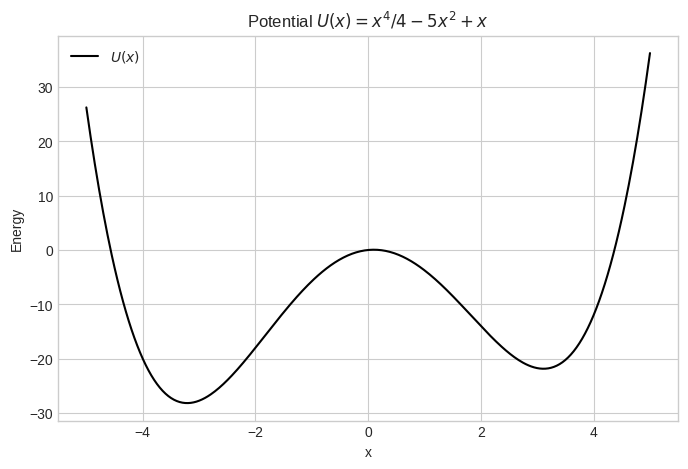

In [33]:
# Define the potential U(x)
def U(x):
    return (x**4)/4 - 5*(x**2) + x

# Define the gradient U'(x) 
def dU(x):
    return x**3 - 10*x + 1

# Visualization of the potential
x_grid = np.linspace(-5, 5, 400)
plt.figure(figsize=(8, 5))
plt.plot(x_grid, U(x_grid), 'k-', label=r'$U(x)$')
plt.title(r"Potential $U(x) = x^4/4 - 5x^2 + x$")
plt.xlabel("x")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.show()


### **Q2(a). Find Local and Global Minima**

We need to find the roots of $U'(x) = 0$ or minimize $U(x)$ numerically.

In [7]:
# We search in two regions based on the plot: around -3 and around +3

res_global = minimize_scalar(U, bounds=(-4, -2), method='bounded')
res_local = minimize_scalar(U, bounds=(2, 4), method='bounded')

x_global = res_global.x
x_local = res_local.x

print(f"Global Minimum found at x ≈ {x_global:.4f}, U(x) ≈ {U(x_global):.4f}")
print(f"Local Minimum found at  x ≈ {x_local:.4f}, U(x) ≈ {U(x_local):.4f}")

# Also find the local maximum (saddle point) between the two minima
# We minimize -U(x) or find root near 0
res_saddle = minimize_scalar(lambda x: -U(x), bounds=(-1, 1), method='bounded')
print(f"Local Maximum  at x ≈ {res_saddle.x:.4f}, U(x) ≈ {-res_saddle.fun:.4f}")



Global Minimum found at x ≈ -3.2111, U(x) ≈ -28.1869
Local Minimum found at  x ≈ 3.1110, U(x) ≈ -21.8631
Local Maximum  at x ≈ 0.1001, U(x) ≈ 0.0500


### **Q2(b). Deterministic Gradient Descent**

We solve the ODE $\dot{x}(t) = -U'(x(t))$ using Euler discretization:
$$ x_{n+1} = x_n - U'(x_n) \Delta t $$


In [24]:
#Define the ODE solver using Euler's method
def solve_ode(x0, dt, T):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    x[0] = x0
    
    for i in range(n_steps - 1):
        # Euler update: x_new = x_old - grad * dt
        x[i+1] = x[i] - dU(x[i]) * dt
    return t, x

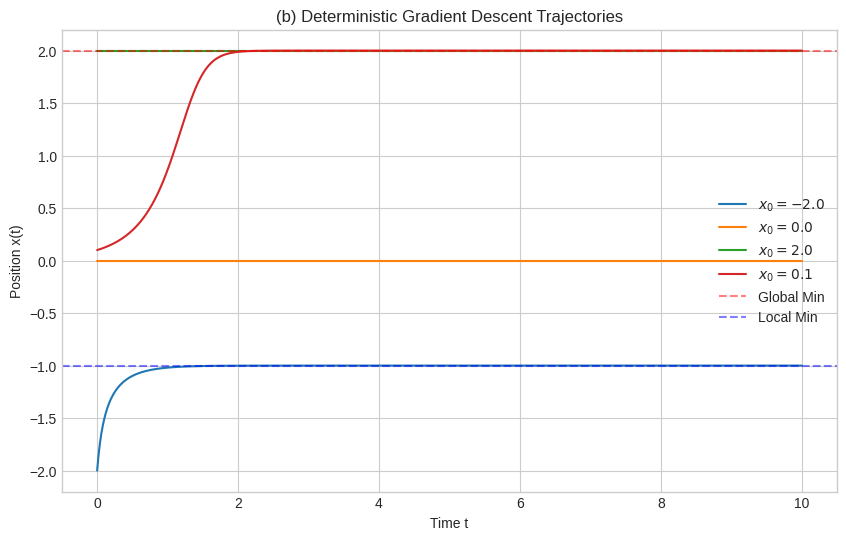

In [25]:
# --- 1-selected Parameters ---
# Run for various initial conditions
initial_conditions = [-2.0, 0.0, 2.0, 0.1]
dt_fixed = 0.01
T_fixed = 10.0

plt.figure(figsize=(10, 6))
for x0 in initial_conditions:
    t, x_traj = solve_ode(x0, dt_fixed, T_fixed)
    plt.plot(t, x_traj, label=f'$x_0={x0}$')


plt.axhline(x_global, color='r', linestyle='--', alpha=0.5, label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', alpha=0.5, label='Local Min')

plt.title("(b) Deterministic Gradient Descent Trajectories")
plt.xlabel("Time t")
plt.ylabel("Position x(t)")
plt.legend()
plt.grid(True)
plt.show()

**Analysis:** In this case, the particle simply rolls down the hill, and its final destination depends entirely on which side of the barrier (the peak at $x=0$) it starts on.

*   If it starts to the **left** of the barrier (e.g., $x_0 = -2.0$), it gets trapped in the **local** minimum ($x=-1$) and cannot climb out to reach the deeper well.
*   If it starts to the **right** of the barrier (e.g., $x_0 = 0.1$), it successfully rolls down to the **global** minimum ($x=2$).
*   Notably, the particle starting exactly **on the peak** ($x_0 = 0.0$) remains stuck in an unstable equilibrium because the gradient is zero and there is no noise to nudge it off.

Simulation Parameters (Randomized):
dt (Step Size): 0.0076
T (Duration):   12.42
Trajectories:   9


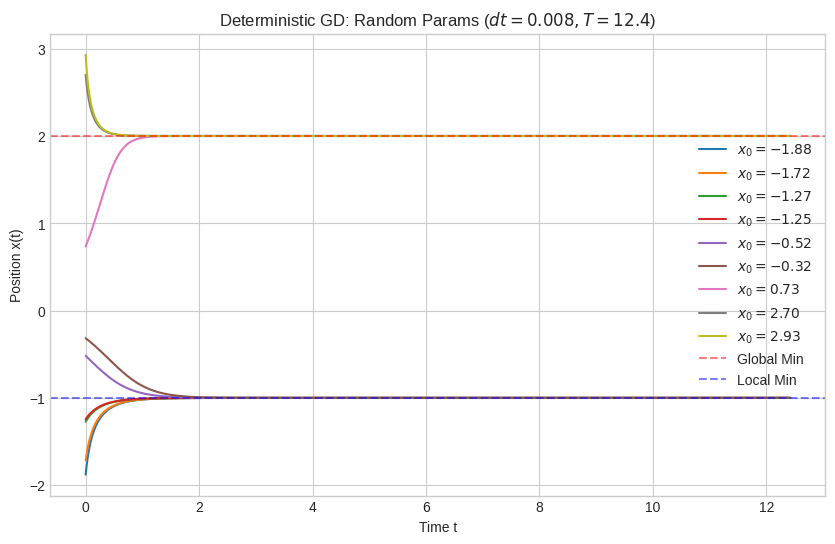

In [31]:
# --- 2. Randomized Parameters ---

# Random Step Size (dt) between 0.001 and 0.05  
dt_random = np.random.uniform(0.001, 0.05)

# Random Total Time (T) between 5.0 and 20.0
T_random = np.random.uniform(5.0, 20.0)

# Random Number of trajectories to plot (between 3 and 10)
num_trajectories = np.random.randint(3, 11)


plt.figure(figsize=(10, 6))

print(f"Simulation Parameters (Randomized):")
print(f"dt (Step Size): {dt_random:.4f}")
print(f"T (Duration):   {T_random:.2f}")
print(f"Trajectories:   {num_trajectories}")

# Generate random initial conditions based on the random count
x0_list = np.random.uniform(-2.5, 3.0, num_trajectories)

for x0 in sorted(x0_list):
    t, x_traj = solve_ode(x0, dt_random, T_random)
    plt.plot(t, x_traj, label=f'$x_0={x0:.2f}$')

# Reference lines
plt.axhline(x_global, color='r', linestyle='--', alpha=0.5, label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', alpha=0.5, label='Local Min')

plt.title(f"Deterministic GD: Random Params ($dt={dt_random:.3f}, T={T_random:.1f}$)")
plt.xlabel("Time t")
plt.ylabel("Position x(t)")
plt.legend()
plt.grid(True)
plt.show()


**Analysis:** In this case, the particle simply rolls down the potential energy hill. The outcome is determined entirely by where the particle starts relative to the barrier (the peak at $x=0$).
*   If it starts on the **left** of the barrier ($x < 0$), it gets stuck in the **Local Minimum** ($x=-1$).
*   If it starts on the **right** of the barrier ($x > 0$), it reaches the **Global Minimum** ($x=2$).

Because the system is deterministic (no noise), a particle caught in the local minimum **cannot climb** the barrier to escape and reach the deeper global minimum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D  # <--- New import for custom legend
from IPython.display import display
from ipywidgets import interact, FloatSlider, IntSlider

# --- 1. Define Physics ---
def dU(x):
    return x**3 - x**2 - 2*x

def U(x):
    return 0.25*x**4 - (1/3)*x**3 - x**2

x_global_min = 2.0
x_local_min = -1.0

# --- 2. ODE Solver ---
def solve_ode(x0, dt, T):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    x[0] = x0
    for i in range(n_steps - 1):
        x[i+1] = x[i] - dU(x[i]) * dt
    return t, x

# --- 3. Interactive Function ---
def plot_system_with_table(dt, T, seed):
    np.random.seed(seed)
    
    # Setup
    num_trajectories = 5
    x0_list = np.random.uniform(-2.5, 3.0, num_trajectories)
    x0_list.sort()
    data = []
    
    # Create Figure
    fig, (ax_pot, ax_traj) = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- LEFT PLOT: Potential U(x) ---
    x_grid = np.linspace(-3.0, 3.5, 200)
    ax_pot.plot(x_grid, U(x_grid), 'k-', lw=2, alpha=0.6) # The black curve
    ax_pot.set_title("Potential Landscape U(x)")
    ax_pot.set_xlabel("Position x")
    ax_pot.set_ylabel("Energy U")
    ax_pot.grid(True)
    ax_pot.set_ylim(-3.5, 6)
    
    # --- RIGHT PLOT: Trajectories ---
    ax_traj.set_title(f"Trajectories (dt={dt}, T={T})")
    ax_traj.set_xlabel("Time t")
    ax_traj.set_ylabel("Position x(t)")
    ax_traj.grid(True)
    ax_traj.set_ylim(-3.0, 3.5)
    
    # Reference Lines
    ax_traj.axhline(x_global_min, color='r', linestyle='--', alpha=0.3, label='Global Min')
    ax_traj.axhline(x_local_min, color='b', linestyle='--', alpha=0.3, label='Local Min')

    colors = plt.cm.jet(np.linspace(0, 1, num_trajectories))
    
    for i, x0 in enumerate(x0_list):
        t, x_path = solve_ode(x0, dt, T)
        c = colors[i]
        
        x_final = x_path[-1]
        u_final = U(x_final)
        
        # Basin Logic
        if abs(x_final - x_global_min) < 0.5: basin = "Global Min"
        elif abs(x_final - x_local_min) < 0.5: basin = "Local Min"
        elif x_final > 3.0 or x_final < -2.5: basin = "Diverged"
        else: basin = "Saddle/Other"

        # Plotting
        ax_traj.plot(t, x_path, color=c, label=f'$x_0={x0:.2f}$')
        
        # Scatter markers on Left Plot
        # Circle (o) = Start
        ax_pot.scatter(x0, U(x0), color=c, s=100, edgecolors='black', zorder=5)
        # Cross (x) = End
        ax_pot.scatter(x_final, u_final, color=c, marker='x', s=80, linewidths=3, zorder=5)
        
        data.append({
            "Initial Pos (x0)": x0,
            "Final Pos (x_T)": x_final,
            "Final Energy (U)": u_final,
            "Basin": basin
        })

    # --- CUSTOM LEGEND FOR LEFT PLOT ---
    # We create "fake" lines to explain the symbols to the user
    legend_elements = [
        Line2D([0], [0], color='black', lw=2, label='Potential U(x)'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Start Point (Circle)'),
        Line2D([0], [0], marker='x', color='gray', linestyle='None', markersize=10, markeredgewidth=2, label='End Point (Cross)')
    ]
    ax_pot.legend(handles=legend_elements, loc='upper center')
    
    # Legend for right plot
    ax_traj.legend(loc='upper right', fontsize=9)
    
    plt.show()
    
    # --- Display Table ---
    df = pd.DataFrame(data)
    styled_df = df.style.format({
        "Initial Pos (x0)": "{:.4f}",
        "Final Pos (x_T)": "{:.4f}",
        "Final Energy (U)": "{:.4f}"
    }).background_gradient(subset=["Final Energy (U)"], cmap="coolwarm_r") \
      .set_caption("<b>Simulation Statistics</b>")
    
    display(styled_df)

# --- 4. Sliders ---
interact(plot_system_with_table, 
         dt=FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Step (dt)'),
         T=IntSlider(value=10, min=5, max=30, step=1, description='Time (T)'),
         seed=IntSlider(value=42, min=1, max=100, step=1, description='Rand Seed')
);

interactive(children=(FloatSlider(value=0.01, description='Step (dt)', max=0.1, min=0.001, step=0.001), IntSli…



---

### **Q2(c). Stochastic Gradient Descent (SGD)**

We solve the SDE using the Euler-Maruyama scheme:
$$ X_{n+1} = X_n - U'(X_n)\Delta t + \sigma \sqrt{\Delta t} \xi_n, \quad \xi_n \sim \mathcal{N}(0,1) $$

**Note:** The problem asks to show the result for $T=100$ and $\sigma=2.5$.

```python
# (c) Stochastic Gradient Descent (SDE)
def solve_sde(x0, sigma, dt=0.01, T=100):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    x[0] = x0
    
    for i in range(n_steps - 1):
        # Generate noise
        xi = np.random.normal(0, 1)
        # Euler-Maruyama update
        drift = -dU(x[i]) * dt
        diffusion = sigma * np.sqrt(dt) * xi
        x[i+1] = x[i] + drift + diffusion
    return t, x

# Parameters from prompt
T_sim = 100
sigma_sim = 2.5
x0_sim = 2.0  # Start at local minimum side

t_sde, x_sde = solve_sde(x0_sim, sigma=sigma_sim, T=T_sim)

plt.figure(figsize=(12, 5))
plt.plot(t_sde, x_sde, alpha=0.7, label=f'SGD path ($\sigma={sigma_sim}$)')
plt.axhline(x_global, color='r', linestyle='--', label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', label='Local Min')
plt.title(f"(c) Stochastic Gradient Descent (T={T_sim}, $\sigma={sigma_sim}$)")
plt.xlabel("Time t")
plt.ylabel("Position X(t)")
plt.legend()
plt.grid(True)
plt.show()
```
**Analysis:** With sufficient noise ($\sigma=2.5$), the particle can **escape the local minimum** by crossing the potential barrier. It fluctuates around both minima, visiting the global minimum more often because it is deeper (lower energy states are more probable).

---

### **Q2(d). Simulated Annealing**

We repeat the SDE simulation but decrease noise over time: $\sigma_t = \frac{\alpha}{\sqrt{t+1}}$.
$$ X_{n+1} = X_n - U'(X_n)\Delta t + \frac{\alpha}{\sqrt{t+1}} \sqrt{\Delta t} \xi_n $$

```python
# (d) Simulated Annealing (Time-dependent noise)
def solve_annealing(x0, alpha, dt=0.01, T=50):
    n_steps = int(T / dt)
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    x[0] = x0
    
    for i in range(n_steps - 1):
        # Annealing schedule
        current_time = i * dt
        sigma_t = alpha / np.sqrt(current_time + 1)
        
        xi = np.random.normal(0, 1)
        drift = -dU(x[i]) * dt
        diffusion = sigma_t * np.sqrt(dt) * xi
        
        x[i+1] = x[i] + drift + diffusion
    return t, x

# Parameters
alpha_ann = 5.0
T_ann = 50
x0_ann = 3.0 # Start far in the local basin

t_ann, x_ann = solve_annealing(x0_ann, alpha=alpha_ann, T=T_ann)

plt.figure(figsize=(12, 5))
plt.plot(t_ann, x_ann, label=r'Annealing path ($\alpha=5$)')
plt.axhline(x_global, color='r', linestyle='--', label='Global Min')
plt.axhline(x_local, color='b', linestyle='--', label='Local Min')
plt.title("(d) Simulated Annealing: Converging to Global Minimum")
plt.xlabel("Time t")
plt.ylabel("Position X(t)")
plt.legend()
plt.grid(True)
plt.show()
```
**Analysis:** Initially, the noise is high, allowing the particle to explore and jump out of the local well. As time progresses, the noise decreases ("cooling"), settling the particle into the deepest basin of attraction (the global minimum) and reducing fluctuations until it converges to the bottom.

---

### **Q2(e). Advantage of Stochastic Gradient Descent**

**Answer:**
The primary advantage of Stochastic Gradient Descent (SGD) over deterministic Gradient Descent is the ability to **escape local minima**. 

1.  **Deterministic:** The trajectory always follows the steepest descent. If initialized in the basin of a local minimum, it gets stuck there forever.
2.  **Stochastic:** The added noise term ($\sigma dW_t$) allows the system to move "uphill" against the gradient occasionally. This allows it to traverse potential barriers (saddles) and explore the state space, increasing the probability of finding the **global minimum** rather than just the nearest local one.